# Week 14: CNN Lab - Rock, Paper, Scissors

**Objective:** Build, train, and test a Convolutional Neural Network (CNN) to classify images of hands playing Rock, Paper, or Scissors.

### Step 1: Setup and Data Download

This first cell downloads the dataset from Kaggle.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

print("Path to dataset files:", path)

In [ ]:
import os

path = r"C:\Users\DEEPTHI\.cache\kagglehub\datasets\drgfreeman\rockpaperscissors\versions\2"
print(os.listdir(path))


['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']


In [ ]:
import shutil
import os

src_root = r"C:\Users\DEEPTHI\.cache\kagglehub\datasets\drgfreeman\rockpaperscissors\versions\2"
dst_root = "./dataset"

os.makedirs(dst_root, exist_ok=True)

folders_to_copy = ["rock", "paper", "scissors"]

for folder in folders_to_copy:
    src_path = os.path.join(src_root, folder)
    dst_path = os.path.join(dst_root, folder)

    if os.path.exists(src_path):
        shutil.copytree(src_path, dst_path, dirs_exist_ok=True)
        print("Copied:", folder)
    else:
        print("Folder not found:", folder)


Copied: rock
Copied: paper
Copied: scissors


### Step 2: Imports and Device Setup

Import the necessary libraries and check if a GPU is available.

In [7]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from PIL import Image
import numpy as np

# TODO: Set the 'device' variable
# Check if CUDA (GPU) is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Using device:", device)

Using device: cpu


### Step 3: Data Loading and Preprocessing

Here we will define our image transformations, load the dataset, split it, and create DataLoaders.

In [9]:
DATA_DIR = "./dataset"

# TODO: Define the image transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset using ImageFolder
full_dataset = datasets.ImageFolder(DATA_DIR, transform=transform)

class_names = full_dataset.classes
print("Classes:", class_names)

# TODO: Split the dataset (80% train, 20% test)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# TODO: Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Total images: {len(full_dataset)}")
print(f"Training images: {len(train_dataset)}")
print(f"Test images: {len(test_dataset)}")


Classes: ['paper', 'rock', 'scissors']
Total images: 2188
Training images: 1750
Test images: 438


### Step 4: Define the CNN Model

Fill in the `conv_block` and `fc_block` with the correct layers.

In [10]:
class RPS_CNN(nn.Module):
    def __init__(self):
        super(RPS_CNN, self).__init__()

        # TODO: Define the convolutional block
        self.conv_block = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # TODO: Fully-connected block
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = self.fc(x)
        return x


# TODO: Initialize model, loss, optimizer
model = RPS_CNN().to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)


RPS_CNN(
  (conv_block): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=3, bias=True)
  )
)


### Step 5: Train the Model

Fill in the core training steps inside the loop.

In [11]:
EPOCHS = 10

for epoch in range(EPOCHS):
    model.train()  # Set the model to training mode
    total_loss = 0

    for images, labels in train_loader:
        # Move data to the correct device
        images, labels = images.to(device), labels.to(device)

        # 1. Clear the gradients
        optimizer.zero_grad()

        # 2. Forward pass
        outputs = model(images)

        # 3. Compute loss
        loss = criterion(outputs, labels)

        # 4. Backward pass
        loss.backward()

        # 5. Update weights
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss = {total_loss/len(train_loader):.4f}")

print("Training complete!")


Epoch 1/10, Loss = 0.5903
Epoch 2/10, Loss = 0.1551
Epoch 3/10, Loss = 0.0703
Epoch 4/10, Loss = 0.0407
Epoch 5/10, Loss = 0.0178
Epoch 6/10, Loss = 0.0188
Epoch 7/10, Loss = 0.0138
Epoch 8/10, Loss = 0.0081
Epoch 9/10, Loss = 0.0075
Epoch 10/10, Loss = 0.0061
Training complete!


### Step 6: Evaluate the Model

Test the model's accuracy on the unseen test set.

In [12]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

# TODO: Use torch.no_grad()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # 1. Get model outputs (logits)
        outputs = model(images)

        # 2. Get predicted class
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 97.26%


### Step 7: Test on a Single Image

Let's see how the model performs on one image.

In [13]:
def predict_image(model, img_path):
    model.eval()

    img = Image.open(img_path).convert("RGB")
    img = transform(img).unsqueeze(0).to(device)  # Apply transforms + batch dimension

    with torch.no_grad():
        # 1. Get raw model outputs (logits)
        output = model(img)

        # 2. Get predicted class index
        _, pred = torch.max(output, 1)

    return class_names[pred.item()]
# test the prediction function
test_img_path = "./dataset/paper/0Uomd0HvOB33m47I.png"
prediction = predict_image(model, test_img_path)
print(f"Model prediction for {test_img_path}: {prediction}")


Model prediction for ./dataset/paper/0Uomd0HvOB33m47I.png: paper


### Step 8: Play the Game!

This code is complete. If your model is trained, you can run this cell to have the model play against itself.

In [15]:
import random
import os

def pick_random_image(class_name):
    folder = f"./dataset/{class_name}"   # FIXED PATH
    files = os.listdir(folder)
    img = random.choice(files)
    return os.path.join(folder, img)

def rps_winner(move1, move2):
    if move1 == move2:
        return "Draw"

    rules = {
        "rock": "scissors",
        "paper": "rock",
        "scissors": "paper"
    }

    if rules[move1] == move2:
        return f"Player 1 wins! {move1} beats {move2}"
    else:
        return f"Player 2 wins! {move2} beats {move1}"

# -----------------------------------------------------------
# 1. Choose any two random classes
# -----------------------------------------------------------

choices = ["rock", "paper", "scissors"]
c1 = random.choice(choices)
c2 = random.choice(choices)

img1_path = pick_random_image(c1)
img2_path = pick_random_image(c2)

print("Randomly selected images:")
print("Image 1:", img1_path)
print("Image 2:", img2_path)

# -----------------------------------------------------------
# 2. Predict their labels using the model
# -----------------------------------------------------------

p1 = predict_image(model, img1_path)
p2 = predict_image(model, img2_path)

print("\nPlayer 1 shows:", p1)
print("Player 2 shows:", p2)

# -----------------------------------------------------------
# 3. Decide the winner
# -----------------------------------------------------------

print("\nRESULT:", rps_winner(p1, p2))


Randomly selected images:
Image 1: ./dataset/scissors\uQLROCDZVtwVCXfm.png
Image 2: ./dataset/scissors\MFlCOcvmOe3jejwy.png

Player 1 shows: scissors
Player 2 shows: scissors

RESULT: Draw


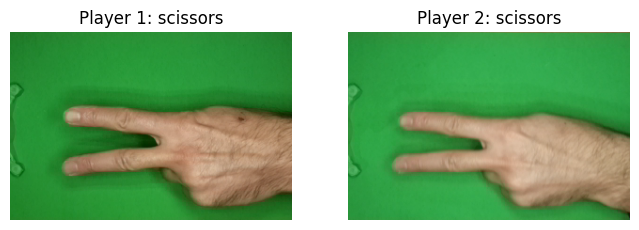

In [17]:
import matplotlib.pyplot as plt

# Display the two random images
plt.figure(figsize=(8, 4))

# Player 1 image
plt.subplot(1, 2, 1)
plt.imshow(Image.open(img1_path))
plt.title(f"Player 1: {p1}")
plt.axis("off")

# Player 2 image
plt.subplot(1, 2, 2)
plt.imshow(Image.open(img2_path))
plt.title(f"Player 2: {p2}")
plt.axis("off")

plt.show()
